In [21]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import datetime as dt
import time
# visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image as mpimg
import seaborn as sns

In [22]:
taxi_df = pd.read_csv('yellow_tripdata_2016-05.csv')
coll_df = pd.read_csv('NYC-vehicle-collisions.csv')

In [56]:
#taxi data elimination and sorting
df = taxi_df.set_index("tpep_pickup_datetime")
df = df[['pickup_longitude','pickup_latitude']]
df = df[((df['pickup_longitude'] < -73.7) & (df['pickup_longitude'] > -74.26)) & ((df['pickup_latitude'] > 40.49) & (df['pickup_latitude'] < 40.92))]
df = df.sort_index(ascending=True)
df

,pickup_longitude,pickup_latitude
tpep_pickup_datetime,,
2016-05-01 00:00:00,-73.985901,40.768040
2016-05-01 00:00:00,-73.781059,40.645020
2016-05-01 00:00:00,-74.001610,40.740990
2016-05-01 00:00:00,-73.987198,40.750507
2016-05-01 00:00:00,-73.981544,40.780739
2016-05-01 00:00:00,-74.013855,40.714119
2016-05-01 00:00:00,-74.005280,40.740192
2016-05-01 00:00:00,-73.991943,40.684601
2016-05-01 00:00:00,-73.993073,40.741573


In [24]:
#collisions data elimination and sorting
coll_data = coll_df[['LATITUDE','LONGITUDE','DATE','TIME']]
coll_data = coll_data[((coll_data['LONGITUDE'] < -73.7) & (coll_data['LONGITUDE'] > -74.26)) & ((coll_data['LATITUDE'] > 40.49) & (coll_data['LATITUDE'] < 40.92))]

In [53]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days*24)):
        yield start_date + dt.timedelta(minutes = n*60)

In [50]:
def data_stream_coll(s):
    datetime = pd.to_datetime(s)
    date = datetime.strftime("%m/%d/%Y")
    time  = datetime.strftime("%-H:%M")
    time_end  = (datetime+dt.timedelta(minutes=59)).strftime("%-H:%M")
    temp = coll_data[(coll_data['DATE'] == date)&(coll_data['TIME'] >= time)&(coll_data['TIME'] <= time_end)]
    return temp

def taxisOfADay(i):
    sum = 0
    for n in range((i-1)*24,i*24):
        sum += len(matrix[n].index)
    return sum

In [60]:
matrix = []
for single_time in daterange(pd.to_datetime(df.index.min()),pd.to_datetime(df.index.max())):
    selected = df.truncate(before = single_time.strftime("%Y-%m-%d %X"), after = (single_time + dt.timedelta(seconds = 3599)).strftime("%Y-%m-%d %X"))
    matrix += [selected]

In [36]:
def data_stream_coll_day(s):
    datetime = pd.to_datetime(s)
    date = datetime.strftime("%m/%d/%Y")
    temp = coll_data[(coll_data['DATE'] == date)]
    return temp

In [62]:
week_mean = [
    len(coll_data[(coll_data['DATE'] == '05/01/2016')|(coll_data['DATE'] == '05/08/2016')|
              (coll_data['DATE'] == '05/15/2016')|(coll_data['DATE'] == '05/22/2016')|
             (coll_data['DATE'] == '05/29/2016')].index)/5,
    len(coll_data[(coll_data['DATE'] == '05/02/2016')|(coll_data['DATE'] == '05/09/2016')|
             (coll_data['DATE'] == '05/16/2016')|(coll_data['DATE'] == '05/23/2016')|
             (coll_data['DATE'] == '05/30/2016')])/5,
    len(coll_data[(coll_data['DATE'] == '05/03/2016')|(coll_data['DATE'] == '05/10/2016')|
             (coll_data['DATE'] == '05/17/2016')|(coll_data['DATE'] == '05/24/2016')|
             (coll_data['DATE'] == '05/31/2016')])/5,
    len(coll_data[(coll_data['DATE'] == '05/04/2016')|(coll_data['DATE'] == '05/11/2016')|
             (coll_data['DATE'] == '05/18/2016')|(coll_data['DATE'] == '05/25/2016')])/4,
    len(coll_data[(coll_data['DATE'] == '05/05/2016')|(coll_data['DATE'] == '05/12/2016')|
             (coll_data['DATE'] == '05/19/2016')|(coll_data['DATE'] == '05/26/2016')])/4,
    len(coll_data[(coll_data['DATE'] == '05/06/2016')|(coll_data['DATE'] == '05/13/2016')|
             (coll_data['DATE'] == '05/20/2016')|(coll_data['DATE'] == '05/27/2016')])/4,
    len(coll_data[(coll_data['DATE'] == '05/07/2016')|(coll_data['DATE'] == '05/14/2016')|
             (coll_data['DATE'] == '05/21/2016')|(coll_data['DATE'] == '05/28/2016')])/4
]
week_mean_taxi = [
    (taxisOfADay(1)+taxisOfADay(8)+taxisOfADay(15)+taxisOfADay(22)+taxisOfADay(29))/5,
    (taxisOfADay(2)+taxisOfADay(9)+taxisOfADay(16)+taxisOfADay(23)+taxisOfADay(30))/5,
    (taxisOfADay(3)+taxisOfADay(10)+taxisOfADay(17)+taxisOfADay(24))/4,
    (taxisOfADay(4)+taxisOfADay(11)+taxisOfADay(18)+taxisOfADay(25))/4,
    (taxisOfADay(5)+taxisOfADay(12)+taxisOfADay(19)+taxisOfADay(26))/4,
    (taxisOfADay(6)+taxisOfADay(13)+taxisOfADay(20)+taxisOfADay(27))/4,
    (taxisOfADay(7)+taxisOfADay(14)+taxisOfADay(21)+taxisOfADay(28))/4
]

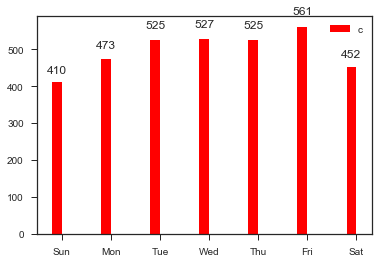

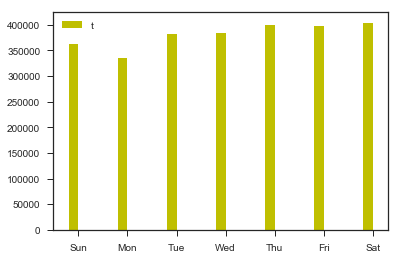

In [74]:
N=7
ind = np.arange(N)
width = 0.2

fig, ax = plt.subplots()
fig, ax2 = plt.subplots()
rects1 = ax.bar(ind, week_mean, width, color='r')
rects2 = ax2.bar(ind, week_mean_taxi, width, color='y')

ax.set_xticks(ind + width / 2)
ax.legend('collisions')
ax2.set_xticks(ind + width / 2)
ax2.legend('taxi_picks')
ax.set_xticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri','Sat'))
ax2.set_xticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri','Sat'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
plt.show()